In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import seaborn as sns

In [2]:
df = pd.read_csv('../data/cryptocurrencypricehistory/coin_Cardano.csv')

In [3]:
df.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Cardano,ADA,2017-10-02 23:59:59,0.030088,0.019969,0.024607,0.025932,57641300.0,6.288991e+08
1,2,Cardano,ADA,2017-10-03 23:59:59,0.027425,0.020690,0.025757,0.020816,16997800.0,5.396927e+08
2,3,Cardano,ADA,2017-10-04 23:59:59,0.022806,0.020864,0.020864,0.021931,9000050.0,5.686195e+08
3,4,Cardano,ADA,2017-10-05 23:59:59,0.022154,0.020859,0.021951,0.021489,5562510.0,5.571390e+08
4,5,Cardano,ADA,2017-10-06 23:59:59,0.021542,0.018360,0.021359,0.018539,7780710.0,4.806646e+08


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1245 entries, 0 to 1244
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        1245 non-null   int64  
 1   Name       1245 non-null   object 
 2   Symbol     1245 non-null   object 
 3   Date       1245 non-null   object 
 4   High       1245 non-null   float64
 5   Low        1245 non-null   float64
 6   Open       1245 non-null   float64
 7   Close      1245 non-null   float64
 8   Volume     1245 non-null   float64
 9   Marketcap  1245 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 97.4+ KB


In [5]:
df['Date'] = pd.to_datetime(df['Date']).dt.date
df = df.set_index(pd.DatetimeIndex(df['Date'])).drop('Date', axis=1).drop('SNo', axis=1)
df.head()

,Name,Symbol,High,Low,Open,Close,Volume,Marketcap
Date,,,,,,,,
2017-10-02,Cardano,ADA,0.030088,0.019969,0.024607,0.025932,57641300.0,6.288991e+08
2017-10-03,Cardano,ADA,0.027425,0.020690,0.025757,0.020816,16997800.0,5.396927e+08
2017-10-04,Cardano,ADA,0.022806,0.020864,0.020864,0.021931,9000050.0,5.686195e+08
2017-10-05,Cardano,ADA,0.022154,0.020859,0.021951,0.021489,5562510.0,5.571390e+08
2017-10-06,Cardano,ADA,0.021542,0.018360,0.021359,0.018539,7780710.0,4.806646e+08


In [6]:
df.describe()

,High,Low,Open,Close,Volume,Marketcap
count,1245.000000,1245.000000,1245.000000,1245.000000,1.245000e+03,1.245000e+03
mean,0.146055,0.129342,0.137758,0.138757,4.729622e+08,3.788101e+09
std,0.190901,0.159500,0.174933,0.177812,1.427985e+09,5.099696e+09
min,0.021050,0.017620,0.018414,0.018539,1.739460e+06,4.806646e+08
25%,0.045570,0.042981,0.044286,0.044328,4.642072e+07,1.149308e+09
50%,0.083514,0.077631,0.080869,0.080952,1.011906e+08,2.102088e+09
75%,0.149314,0.138102,0.143086,0.143573,2.576860e+08,3.779666e+09
max,1.476653,1.234138,1.242145,1.324860,1.914198e+10,4.121970e+10


<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

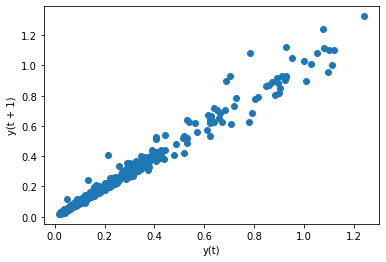

In [7]:
pd.plotting.lag_plot(df['Close'])

The closing prices appear to be highly correlated with each other.

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

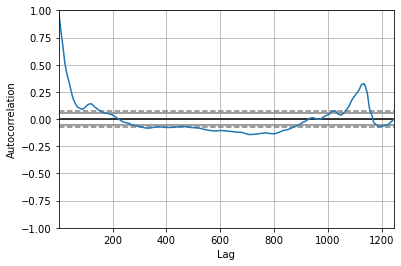

In [8]:
pd.plotting.autocorrelation_plot(df['Close'])

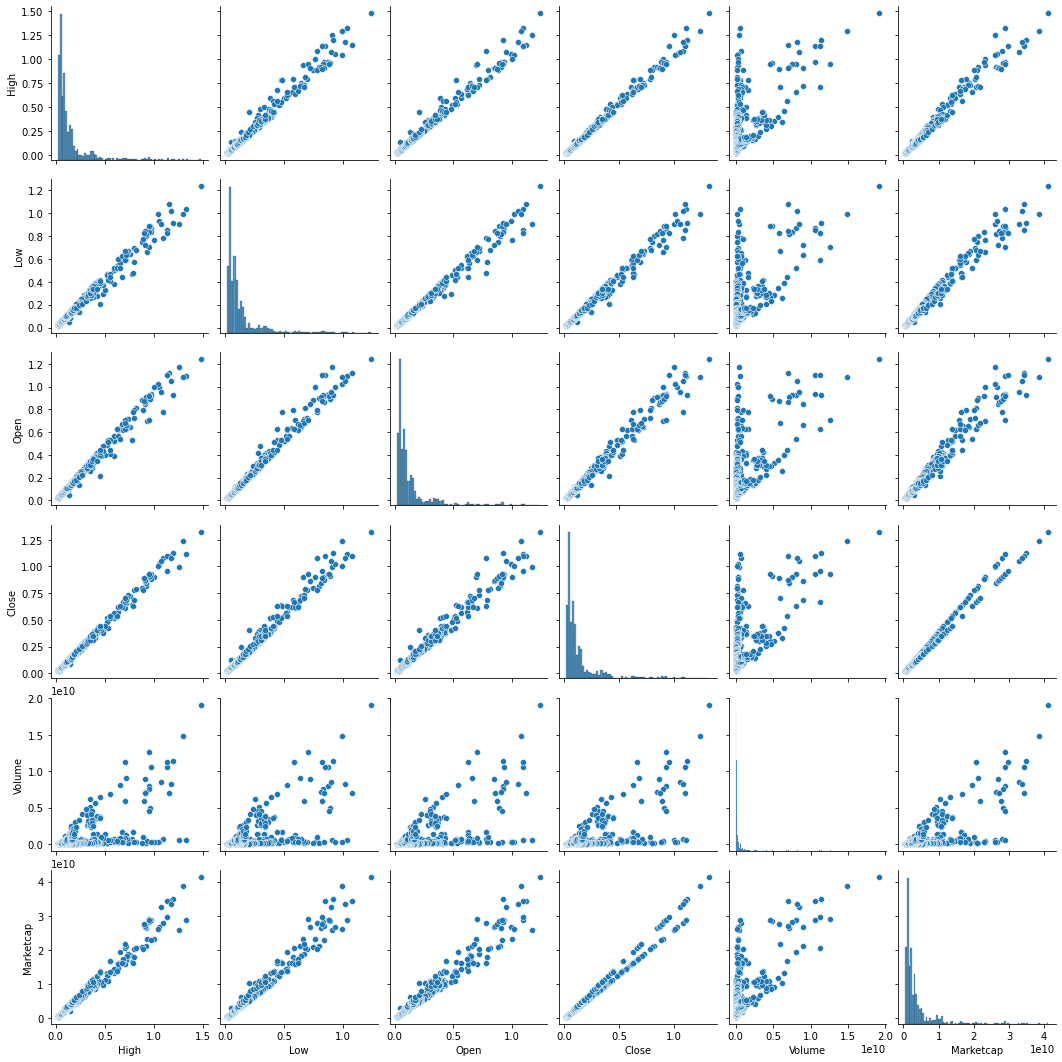

In [9]:
sns.pairplot(df)

## 4/26/21

### Linear regression baseline

In [10]:
# log scaling
X = df.drop('Close', axis=1).iloc[:,2:].apply(np.log).values
y = df['Close'].apply(np.log).values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1337)

In [11]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_hat = linreg.predict(X_test)
print(linreg.coef_)
print(linreg.intercept_)
print(linreg.score(X_test, y_test))
print(mean_squared_error(y_test, y_hat))

[ 0.66328252  0.45450193 -0.37581174 -0.0082232   0.26256301]
-6.144304336329265
0.9990820298676506
0.000684347265162952


Text(0.5, 1.0, 'Observed versus Predicted (ADA)')

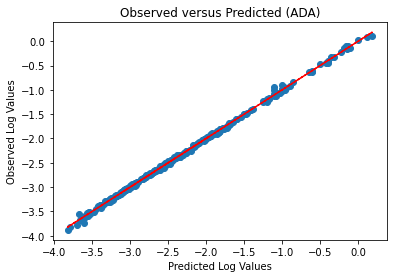

In [12]:
plt.plot(y_hat, y_test, marker='o', linestyle='')
plt.xlabel('Predicted Log Values')
plt.ylabel('Observed Log Values')
plt.plot(np.dot(X_test, linreg.coef_) + linreg.intercept_, y_hat, color='red', linestyle='--')
plt.title('Observed versus Predicted (ADA)')

Text(0, 0.5, '% Error')

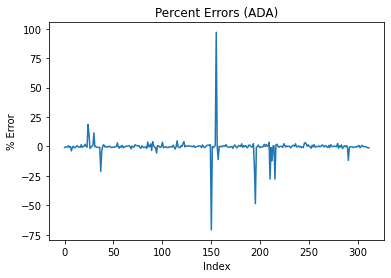

In [13]:
errors = (y_test - y_hat)/(y_test) * 100
plt.plot(errors)
plt.title('Percent Errors (ADA)')
plt.xlabel('Index')
plt.ylabel('% Error')

Text(0.5, 1.0, 'Percent Errors (ADA)')

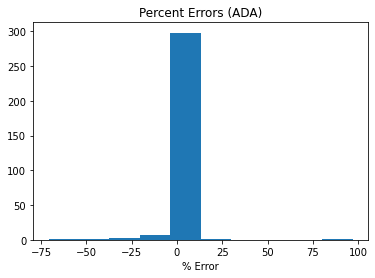

In [14]:
plt.hist(errors)
plt.xlabel('% Error')
plt.title('Percent Errors (ADA)')

In [15]:
# april 16 - open 1.48 close 1.42
far_off = np.exp(linreg.predict([np.log([1.52, 1.34, 1.48, 5692183858, 45269118282])]))
print(far_off, abs(((1.42 - far_off)/1.42)*100))

[1.457334] [2.62915494]


In [16]:
# march 9 - open 1.12 close 1.20
far_off = np.exp(linreg.predict([np.log([1.21, 1.11, 1.12, 5317733185, 38183375234])]))
print(far_off, abs(((1.20 - far_off)/1.20)*100))

[1.22182073] [1.81839426]


In [17]:
# Just open price
X = df['Open'].apply(np.log).values.reshape((len(df['Open']), 1))
y = df['Close'].apply(np.log).values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1337)

In [18]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_hat = linreg.predict(X_test)
print(linreg.coef_)
print(linreg.intercept_)
print(linreg.score(X_test, y_test))
print(mean_squared_error(y_test, y_hat))

[0.9995247]
0.003505045214886149
0.9922621351953329
0.0057685826920338395


Text(0.5, 1.0, 'Observed versus Predicted (ADA Open Price)')

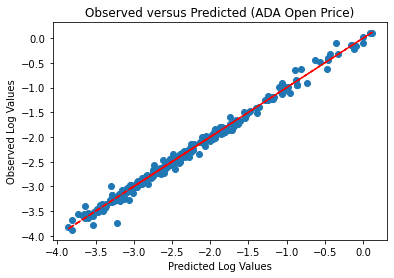

In [19]:
plt.plot(y_hat, y_test, marker='o', linestyle='')
plt.xlabel('Predicted Log Values')
plt.ylabel('Observed Log Values')
plt.plot(np.dot(X_test, linreg.coef_) + linreg.intercept_, y_hat, color='red', linestyle='--')
plt.title('Observed versus Predicted (ADA Open Price)')

Text(0, 0.5, '% Error')

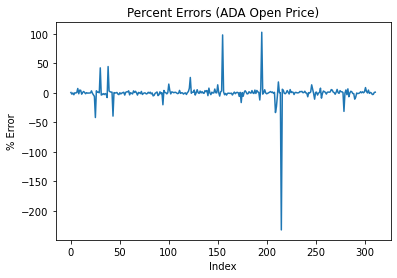

In [20]:
errors = (y_test - y_hat)/(y_test) * 100
plt.plot(errors)
plt.title('Percent Errors (ADA Open Price)')
plt.xlabel('Index')
plt.ylabel('% Error')

Text(0.5, 1.0, 'Percent Errors (ADA Open Price)')

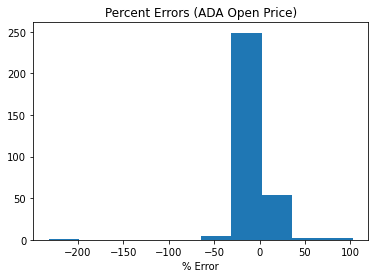

In [21]:
plt.hist(errors)
plt.xlabel('% Error')
plt.title('Percent Errors (ADA Open Price)')

Using just the open price as the lone explanatory variable seems to cause higher errors than using all the features from the ADA data.

### Adding SNP data as features

In [22]:
snp_df = pd.read_csv('../data/snp/snp500_2013_2021.csv')
snp_df.index = pd.to_datetime(snp_df['Date'])
snp_df = snp_df.drop('Date', axis=1)
snp_df = snp_df.rename(columns={'Open':'Open_snp', 'High': 'High_snp', 'Low': 'Low_snp', 'Close': 'Close_snp'})
snp_df = snp_df[df.index.min():df.index.max()]
snp_df.head()

,Open_snp,High_snp,Low_snp,Close_snp
Date,,,,
2017-10-02,2521.20,2529.23,2520.40,2529.12
2017-10-03,2530.34,2535.13,2528.85,2534.58
2017-10-04,2533.48,2540.53,2531.80,2537.74
2017-10-05,2540.86,2552.51,2540.02,2552.07
2017-10-06,2547.44,2549.41,2543.79,2549.33


In [23]:
merged_df = pd.merge(df, snp_df, left_index=True, right_index=True)
merged_df.head()

,Name,Symbol,High,Low,Open,Close,Volume,Marketcap,Open_snp,High_snp,Low_snp,Close_snp
Date,,,,,,,,,,,,
2017-10-02,Cardano,ADA,0.030088,0.019969,0.024607,0.025932,57641300.0,6.288991e+08,2521.20,2529.23,2520.40,2529.12
2017-10-03,Cardano,ADA,0.027425,0.020690,0.025757,0.020816,16997800.0,5.396927e+08,2530.34,2535.13,2528.85,2534.58
2017-10-04,Cardano,ADA,0.022806,0.020864,0.020864,0.021931,9000050.0,5.686195e+08,2533.48,2540.53,2531.80,2537.74
2017-10-05,Cardano,ADA,0.022154,0.020859,0.021951,0.021489,5562510.0,5.571390e+08,2540.86,2552.51,2540.02,2552.07
2017-10-06,Cardano,ADA,0.021542,0.018360,0.021359,0.018539,7780710.0,4.806646e+08,2547.44,2549.41,2543.79,2549.33


In [24]:
# adding snp data
X = merged_df.drop(['Close', 'Close_snp'], axis=1).loc[:,'High':].apply(np.log).values
y = merged_df['Close'].apply(np.log).values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1337)

In [25]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_hat = linreg.predict(X_test)
print(linreg.coef_)
print(linreg.intercept_)
print(linreg.score(X_test, y_test))
print(mean_squared_error(y_test, y_hat))

[ 0.60823633  0.45363955 -0.35515564 -0.00331475  0.29365582 -0.21598821
 -0.15360325  0.29763772]
-6.412018609607147
0.9991379157165784
0.0006426843324299334


Text(0.5, 1.0, 'Observed versus Predicted (ADA + SNP500)')

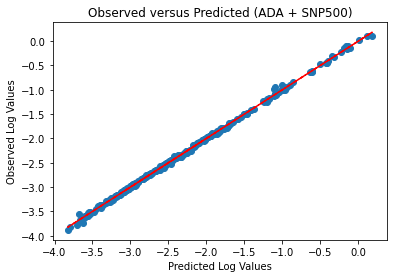

In [26]:
plt.plot(y_hat, y_test, marker='o', linestyle='')
plt.xlabel('Predicted Log Values')
plt.ylabel('Observed Log Values')
plt.plot(np.dot(X_test, linreg.coef_) + linreg.intercept_, y_hat, color='red', linestyle='--')
plt.title('Observed versus Predicted (ADA + SNP500)')

Text(0, 0.5, '% Error')

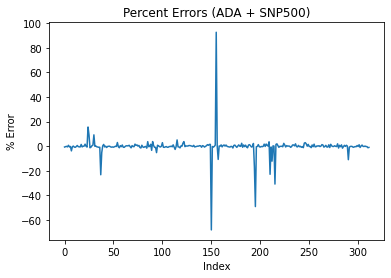

In [27]:
errors = (y_test - y_hat)/(y_test) * 100
plt.plot(errors)
plt.title('Percent Errors (ADA + SNP500)')
plt.xlabel('Index')
plt.ylabel('% Error')

Text(0.5, 1.0, '% Error (ADA + SNP500)')

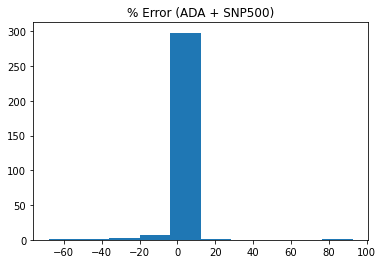

In [28]:
plt.hist(errors)
plt.title('% Error (ADA + SNP500)')

It appears that adding the SNP 500 features only marginally decreases the error of the model.

### Adding Bitcoin features

In [29]:
bitcoin_df = pd.read_csv('../data/cryptocurrencypricehistory/coin_Bitcoin.csv')
bitcoin_df.index = pd.to_datetime(bitcoin_df['Date']).dt.date
bitcoin_df = bitcoin_df.drop(['SNo', 'Name', 'Symbol', 'Date'], axis=1)
bitcoin_df = bitcoin_df.rename(columns={'Open':'Open_bit', 'High': 'High_bit', 'Low': 'Low_bit', 'Close': 'Close_bit', 
                                        'Volume': 'Volume_bit', 'Marketcap': 'Marketcap_bit'})
bitcoin_df = bitcoin_df[df.index.min():df.index.max()]
bitcoin_df.head()

,High_bit,Low_bit,Open_bit,Close_bit,Volume_bit,Marketcap_bit
Date,,,,,,
2017-10-02,4470.229980,4377.459961,4395.810059,4409.319824,1.431730e+09,7.319565e+10
2017-10-03,4432.470215,4258.890137,4408.459961,4317.479980,1.288020e+09,7.168107e+10
2017-10-04,4352.310059,4210.419922,4319.370117,4229.359863,1.116770e+09,7.022503e+10
2017-10-05,4362.640137,4164.049805,4229.879883,4328.410156,1.161770e+09,7.187628e+10
2017-10-06,4413.270020,4320.529785,4324.459961,4370.810059,1.069940e+09,7.258926e+10


In [30]:
merged_df = pd.merge(df, bitcoin_df, left_index=True, right_index=True)
merged_df.head()

,Name,Symbol,High,Low,Open,Close,Volume,Marketcap,High_bit,Low_bit,Open_bit,Close_bit,Volume_bit,Marketcap_bit
Date,,,,,,,,,,,,,,
2017-10-02,Cardano,ADA,0.030088,0.019969,0.024607,0.025932,57641300.0,6.288991e+08,4470.229980,4377.459961,4395.810059,4409.319824,1.431730e+09,7.319565e+10
2017-10-03,Cardano,ADA,0.027425,0.020690,0.025757,0.020816,16997800.0,5.396927e+08,4432.470215,4258.890137,4408.459961,4317.479980,1.288020e+09,7.168107e+10
2017-10-04,Cardano,ADA,0.022806,0.020864,0.020864,0.021931,9000050.0,5.686195e+08,4352.310059,4210.419922,4319.370117,4229.359863,1.116770e+09,7.022503e+10
2017-10-05,Cardano,ADA,0.022154,0.020859,0.021951,0.021489,5562510.0,5.571390e+08,4362.640137,4164.049805,4229.879883,4328.410156,1.161770e+09,7.187628e+10
2017-10-06,Cardano,ADA,0.021542,0.018360,0.021359,0.018539,7780710.0,4.806646e+08,4413.270020,4320.529785,4324.459961,4370.810059,1.069940e+09,7.258926e+10


In [31]:
# adding snp data
X = merged_df.drop(['Close', 'Close_bit'], axis=1).loc[:,'High':].apply(np.log).values
y = merged_df['Close'].apply(np.log).values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1337)

In [32]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_hat = linreg.predict(X_test)
print(linreg.coef_)
print(linreg.intercept_)
print(linreg.score(X_test, y_test))
print(mean_squared_error(y_test, y_hat))

[ 0.8006903   0.38153832 -0.38004331 -0.02240263  0.22946976 -0.48427618
 -0.34587809  0.25058812  0.00580707  0.55619766]
-14.234750048449175
0.9994103812228062
0.0004395611397819773


Text(0.5, 1.0, 'Observed versus Predicted (ADA + BTC)')

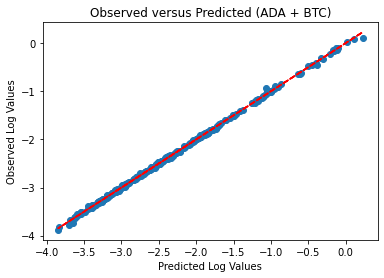

In [33]:
plt.plot(y_hat, y_test, marker='o', linestyle='')
plt.xlabel('Predicted Log Values')
plt.ylabel('Observed Log Values')
plt.plot(np.dot(X_test, linreg.coef_) + linreg.intercept_, y_hat, color='red', linestyle='--')
plt.plot(np.dot(X_test, linreg.coef_) + linreg.intercept_, y_hat, color='red', linestyle='--')
plt.title('Observed versus Predicted (ADA + BTC)')

Text(0, 0.5, '% Error')

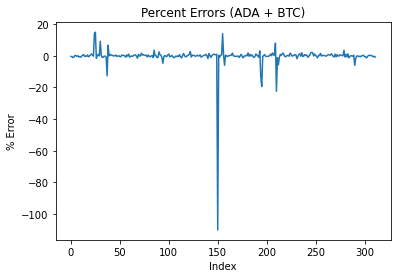

In [34]:
errors = (y_test - y_hat)/(y_test) * 100
plt.plot(errors)
plt.title('Percent Errors (ADA + BTC)')
plt.xlabel('Index')
plt.ylabel('% Error')

Text(0.5, 1.0, '% Error (ADA + BTC)')

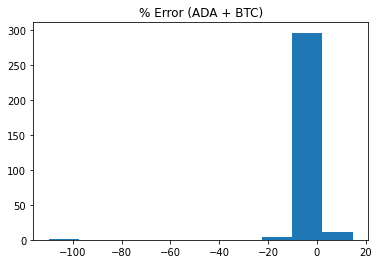

In [35]:
plt.hist(errors)
plt.title('% Error (ADA + BTC)')

Adding the bitcoin features appears to have lowered the error generally.